---
title: Assignment 02
author: Jinpeng Zhu - 1907843
date: 2025-10-01
format:
  pdf:
    echo: false
---

\newpage

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [108]:
ton_COG = pd.read_csv(r".\Tonnage_COG_Table.csv")

## (Q1) Compute Average Grade and Cumulative Ore tonnage

In [109]:

# add a two cols for Cumulative Ore Tonnage (kt) and Average grade
ton_COG['Cumulative Ore Tonnage (kt)'] = ton_COG['Ore_Tonnage_kt'][::-1].cumsum()[::-1]

ton_COG['Average grade'] = (ton_COG['Ore_Tonnage_kt'][::-1] * ton_COG['COG_oz_per_t'][::-1]).cumsum()[::-1] / ton_COG[
    'Cumulative Ore Tonnage (kt)']
ton_COG


,Interval,COG_oz_per_t,Ore_Tonnage_kt,Cumulative Ore Tonnage (kt),Average grade
0,1,0.010,70000,125525,0.039504
1,2,0.023,7257,55525,0.076699
2,3,0.028,6319,48268,0.084773
3,4,0.033,5591,41949,0.093325
4,5,0.038,4598,36358,0.102602
5,6,0.043,4277,31760,0.111954
6,7,0.048,3465,27483,0.122685
7,8,0.053,2438,24018,0.133460
8,9,0.058,2307,21580,0.142550
9,10,0.063,1747,19273,0.152670


\newpage
## (Q1) Plot cumulative ore tonnage vs COG

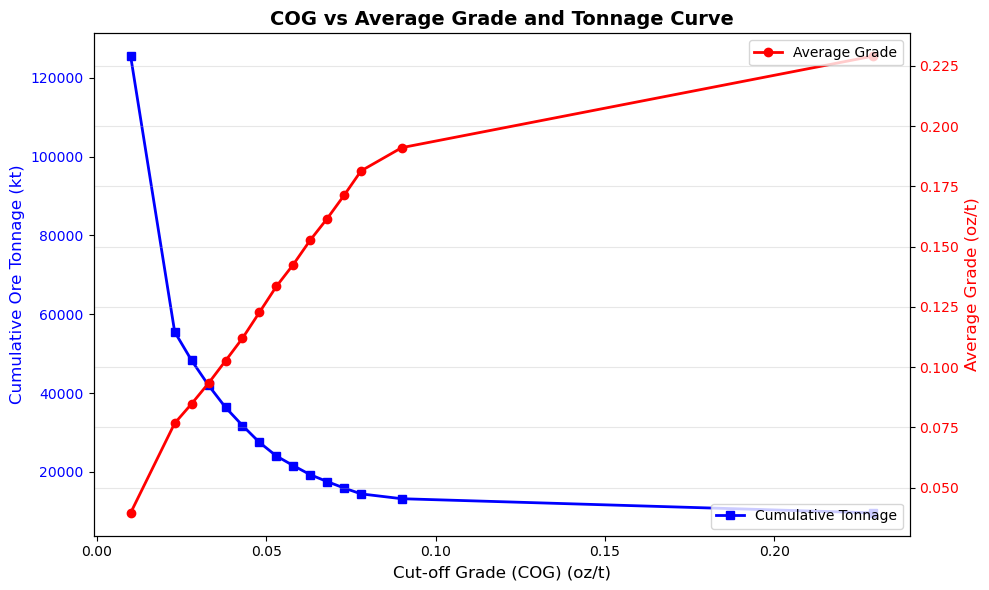

In [110]:
fig, ax2 = plt.subplots(figsize=(10, 6))

ax1 = ax2.twinx()
ax1.plot(ton_COG['COG_oz_per_t'], ton_COG['Average grade'],
         color='red', marker='o', linewidth=2, label='Average Grade')
ax1.set_xlabel('Cut-off Grade (COG) (oz/t)', fontsize=12)
ax1.set_ylabel('Average Grade (oz/t)', color='red', fontsize=12)
ax1.tick_params(axis='y', labelcolor='red')
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper right')

# ax2 = ax1.twinx()
ax2.plot(ton_COG['COG_oz_per_t'], ton_COG['Cumulative Ore Tonnage (kt)'],
         color='blue', marker='s', linewidth=2, label='Cumulative Tonnage')
ax2.set_ylabel('Cumulative Ore Tonnage (kt)', color='blue', fontsize=12)
ax2.tick_params(axis='y', labelcolor='blue')
ax2.set_xlabel('Cut-off Grade (COG) (oz/t)', fontsize=12)
ax2.legend(loc='lower right')
plt.title('COG vs Average Grade and Tonnage Curve', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


## (Q3) Interpolate and mark cumulative ore tonnage at COG = 0.0163

In [111]:
from scipy.interpolate import interp1d

cog_target = 0.0163
gc = 0.0165

interp_tonnage = interp1d(ton_COG['COG_oz_per_t'], ton_COG['Cumulative Ore Tonnage (kt)'], kind='linear')
interp_grade = interp1d(ton_COG['COG_oz_per_t'], ton_COG['Average grade'], kind='linear')
gc_interp_tonnage = interp1d(ton_COG['COG_oz_per_t'], ton_COG['Cumulative Ore Tonnage (kt)'], kind='linear')
gc_interp_grade = interp1d(ton_COG['COG_oz_per_t'], ton_COG['Average grade'], kind='linear')

tonnage_at_target = interp_tonnage(cog_target)
grade_at_target = interp_grade(cog_target)
gc_tonnage_at_target = interp_tonnage(gc)
gc_grade_at_target = interp_grade(gc)

print(f"At COG = {cog_target} oz/t:")
print(f"Cumulative Ore Tonnage = {tonnage_at_target:.2f} kt")
print(f"Average Grade = {grade_at_target:.4f} oz/t")

At COG = 0.0163 oz/t:
Cumulative Ore Tonnage = 91601.92 kt
Average Grade = 0.0575 oz/t


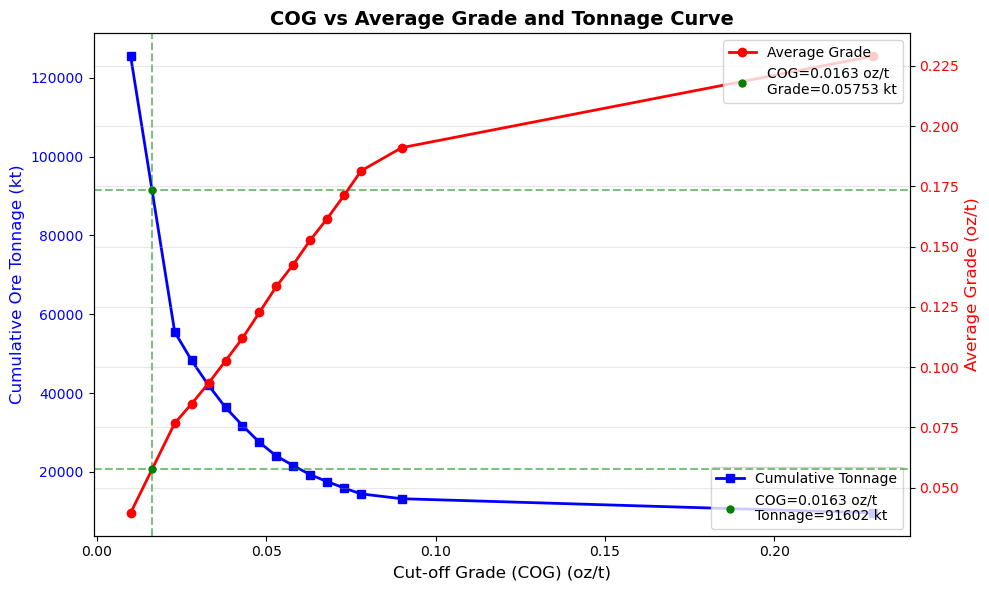

In [112]:
fig, ax2 = plt.subplots(figsize=(10, 6))

ax1 = ax2.twinx()
ax1.plot(ton_COG['COG_oz_per_t'], ton_COG['Average grade'],
         color='red', marker='o', linewidth=2, label='Average Grade')
ax1.plot(cog_target, grade_at_target, 'o', color='green', markersize=5,
         label=f'COG={cog_target} oz/t\nGrade={grade_at_target:.05f} oz/t', zorder=5)
ax1.axhline(y=grade_at_target, color='green', linestyle='--', alpha=0.5)
ax1.set_xlabel('Cut-off Grade (COG) (oz/t)', fontsize=12)
ax1.set_ylabel('Average Grade (oz/t)', color='red', fontsize=12)
ax1.tick_params(axis='y', labelcolor='red')
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper right')

ax2.plot(ton_COG['COG_oz_per_t'], ton_COG['Cumulative Ore Tonnage (kt)'],
         color='blue', marker='s', linewidth=2, label='Cumulative Tonnage')
ax2.set_ylabel('Cumulative Ore Tonnage (kt)', color='blue', fontsize=12)
ax2.tick_params(axis='y', labelcolor='blue')
ax2.set_xlabel('Cut-off Grade (COG) (oz/t)', fontsize=12)
ax2.legend(loc='lower right')

ax2.plot(cog_target, tonnage_at_target, 'o', color='green', markersize=5,
         label=f'COG={cog_target} oz/t\nTonnage={tonnage_at_target:.0f} kt', zorder=5)
ax2.axvline(x=cog_target, color='green', linestyle='--', alpha=0.5)
ax2.axhline(y=tonnage_at_target, color='green', linestyle='--', alpha=0.5)
ax2.legend(loc='lower right')

plt.title('COG vs Average Grade and Tonnage Curve', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(r".\COG_vs_Average_Grade_and_Tonnage_Curve.png")


## (Q4) Mark average grade at COG = 0.0165 on the figure

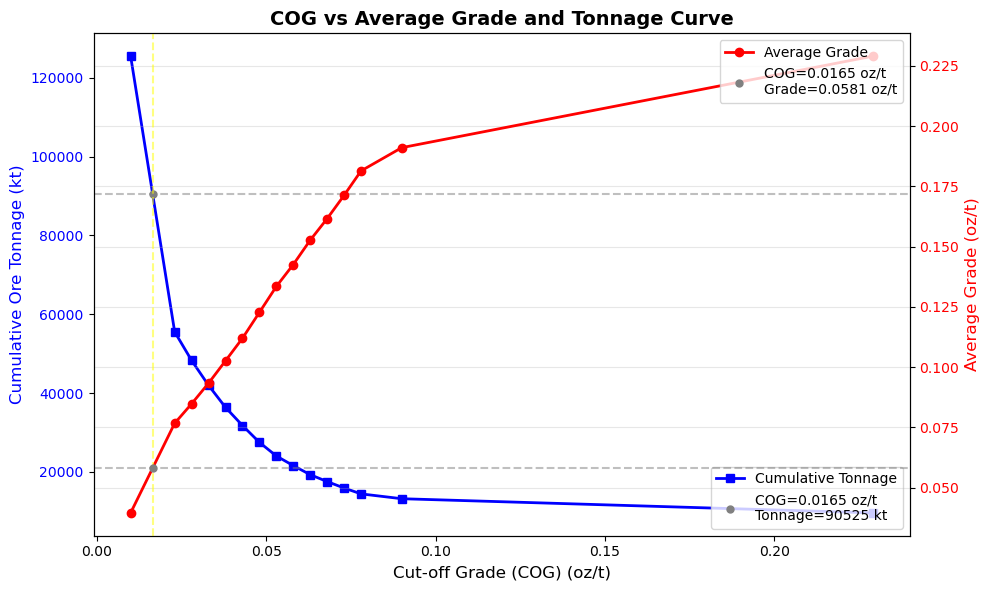

In [116]:
fig, ax2 = plt.subplots(figsize=(10, 6))

ax1 = ax2.twinx()
ax1.plot(ton_COG['COG_oz_per_t'], ton_COG['Average grade'],
         color='red', marker='o', linewidth=2, label='Average Grade')
ax1.set_xlabel('Cut-off Grade (COG) (oz/t)', fontsize=12)
ax1.set_ylabel('Average Grade (oz/t)', color='red', fontsize=12)
ax1.tick_params(axis='y', labelcolor='red')
ax1.grid(True, alpha=0.3)

ax1.plot(gc, gc_grade_at_target, 'o', color='gray', markersize=5,
         label=f'COG={gc} oz/t\nGrade={gc_grade_at_target:.4f} oz/t', zorder=5)
ax1.axvline(x=gc, color='yellow', linestyle='--', alpha=0.5)
ax1.axhline(y=gc_grade_at_target, color='gray', linestyle='--', alpha=0.5)
ax1.legend(loc='upper right')

ax2.plot(ton_COG['COG_oz_per_t'], ton_COG['Cumulative Ore Tonnage (kt)'],
         color='blue', marker='s', linewidth=2, label='Cumulative Tonnage')
ax2.set_ylabel('Cumulative Ore Tonnage (kt)', color='blue', fontsize=12)
ax2.tick_params(axis='y', labelcolor='blue')
ax2.set_xlabel('Cut-off Grade (COG) (oz/t)', fontsize=12)

# ax2.plot(cog_target, tonnage_at_target, 'o', color='green', markersize=5,
         # label=f'COG={cog_target} oz/t\nTonnage={tonnage_at_target:.0f} kt', zorder=5)
# ax2.axhline(y=tonnage_at_target, color='green', linestyle='--', alpha=0.5)
ax2.plot(gc, gc_tonnage_at_target, 'o', color='gray', markersize=5,
         label=f'COG={gc} oz/t\nTonnage={gc_tonnage_at_target:.0f} kt', zorder=5)
ax2.axhline(y=gc_tonnage_at_target, color='gray', linestyle='--', alpha=0.5)
ax2.legend(loc='lower right')

plt.title('COG vs Average Grade and Tonnage Curve', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()
